In [2]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD
from keras.layers.core import Dropout

Using TensorFlow backend.


In [3]:
n_in = 784
n_hiddens = [200, 200]
n_out = 10
activation = 'relu'
p_keep = 0.5

model = Sequential()
for i, input_dim in enumerate(([n_in] + n_hiddens)[:-1]):
    model.add(Dense(n_hiddens[i], input_dim=input_dim))
    model.add(Activation(activation))
    model.add(Dropout(p_keep))
    
model.add(Dense(n_out))
model.add(Activation('softmax'))

In [4]:
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import numpy as np
import tensorflow as tf

mnist = datasets.fetch_mldata('MNIST original', data_home='.')

D:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22. Please use fetch_openml.
  warnings.warn(msg, category=DeprecationWarning)
D:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22. Please use fetch_openml.
  warnings.warn(msg, category=DeprecationWarning)


In [5]:
n = len(mnist.data)
N = 10000
indices = np.random.permutation(range(n))[:N]
X = mnist.data[indices]
y = mnist.target[indices]
Y = np.eye(10)[y.astype(int)]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8)

In [14]:
model.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.005), metrics=['accuracy'])

In [15]:
model.fit(X_train, Y_train, epochs=100, batch_size=100)

Epoch 1/100
8000/8000 [==============================] - 1s 76us/step - loss: 0.9836 - accuracy: 0.6407
Epoch 2/100
8000/8000 [==============================] - 1s 80us/step - loss: 1.0410 - accuracy: 0.6324
Epoch 3/100
8000/8000 [==============================] - 1s 70us/step - loss: 1.0414 - accuracy: 0.6296
Epoch 4/100
8000/8000 [==============================] - 0s 49us/step - loss: 1.0541 - accuracy: 0.6201
Epoch 5/100
8000/8000 [==============================] - 0s 58us/step - loss: 1.0205 - accuracy: 0.6346
Epoch 6/100
8000/8000 [==============================] - 0s 52us/step - loss: 1.0302 - accuracy: 0.6291
Epoch 7/100
8000/8000 [==============================] - 0s 59us/step - loss: 1.0126 - accuracy: 0.6342
Epoch 8/100
8000/8000 [==============================] - 0s 50us/step - loss: 1.0369 - accuracy: 0.6286
Epoch 9/100
8000/8000 [==============================] - 1s 65us/step - loss: 1.0164 - accuracy: 0.6373
Epoch 10/100
8000/8000 [==============================] - 1s 69u

8000/8000 [==============================] - 0s 55us/step - loss: 0.7719 - accuracy: 0.7369
Epoch 79/100
8000/8000 [==============================] - 0s 60us/step - loss: 0.7537 - accuracy: 0.7494
Epoch 80/100
8000/8000 [==============================] - 0s 49us/step - loss: 0.7628 - accuracy: 0.7408
Epoch 81/100
8000/8000 [==============================] - 0s 60us/step - loss: 0.7580 - accuracy: 0.7458
Epoch 82/100
8000/8000 [==============================] - 0s 51us/step - loss: 0.7401 - accuracy: 0.7530
Epoch 83/100
8000/8000 [==============================] - 1s 67us/step - loss: 0.7663 - accuracy: 0.7442
Epoch 84/100
8000/8000 [==============================] - 0s 51us/step - loss: 0.7567 - accuracy: 0.7441
Epoch 85/100
8000/8000 [==============================] - 1s 66us/step - loss: 0.7282 - accuracy: 0.7539
Epoch 86/100
8000/8000 [==============================] - 0s 56us/step - loss: 0.7367 - accuracy: 0.7491
Epoch 87/100
8000/8000 [==============================] - 1s 66us/st

In [16]:
loss_and_metrics = model.evaluate(X_test, Y_test)

2000/2000 [==============================] - 0s 69us/step


In [17]:
print(loss_and_metrics)

[0.5590709671974182, 0.906000018119812]


In [101]:
class DNN(object):
    def __init__(self, n_in, n_hiddens, n_out):
        #초기화 처리
        self.n_in = n_in
        self.n_hiddens = n_hiddens
        self.n_out = n_out
        self.weights = []
        self.biases = []
        self._x = None
        self._t = None
        self._keep_prob = None
        self._sess = None
        self._history = {
            'accuracy': [],
            'loss': []
        }
        self.accuracy_temp = None
        
    def weight_variable(self, shape):
        initial = tf.truncated_normal(shape, stddev=0.01)
        return tf.Variable(initial)
    
    def bias_variable(self, shape):
        initial = tf.zeros(shape)
        return tf.Variable(initial)
    
    def inference(self, x, keep_prob):
        # 입력층 - 은닉층, 은닉층 - 은닉층
        for i, n_hidden in enumerate(self.n_hiddens):
            if i == 0:
                input = x
                input_dim = self.n_in
            else:
                input = output
                input_dim = self.n_hiddens[i-1]
            
            self.weights.append(self.weight_variable([input_dim, n_hidden]))
            self.biases.append(self.bias_variable([n_hidden]))
            
            h = tf.nn.relu(tf.matmul(input, self.weights[-1]) + self.biases[-1])
            output = tf.nn.dropout(h, keep_prob)
            
        # 은닉층 - 출력층
        self.weights.append(self.weight_variable([self.n_hiddens[-1], self.n_out]))
        self.biases.append(self.bias_variable([self.n_out]))
        
        y = tf.nn.softmax(tf.matmul(output, self.weights[-1]) + self.biases[-1])
        return y
    
    def loss(self, y, t):
        cross_entropy = tf.reduce_mean(-tf.reduce_sum(t*tf.log(y), reduction_indices=[1]))
        return cross_entropy
    
    def training(self, loss):
        optimizer = tf.train.GradientDescentOptimizer(0.01)
        train_step = optimizer.minimize(loss)
        return train_step
    
    def accuracy(self, y, t):
        correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(t, 1))
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
        self.accuracy_temp = accuracy
        return accuracy
    
    def fit(self, X_train, Y_train, epochs=100, batch_size=100, p_keep=0.5, verbose=1):
        # 학습 처리
        x = tf.placeholder(tf.float32, shape=[None, self.n_in])
        t = tf.placeholder(tf.float32, shape=[None, self.n_out])
        keep_prob = tf.placeholder(tf.float32)
        
        # evaluate()용으로 작성해둔다
        self._x = x
        self._t = t
        self._keep_prob = keep_prob
        
        y = self.inference(x, keep_prob)
        loss = self.loss(y, t)
        train_step = self.training(loss)
        accuracy = self.accuracy(y, t)
        
        init = tf.global_variables_initializer()
        sess = tf.Session()
        sess.run(init)
        
        # evaluate()용으로 작성해둔다
        self._sess = sess
        
        N_train = len(X_train)
        n_batches = 20#int(N_train)
        
        for epoch in range(epochs):
            X_, Y_ = shuffle(X_train, Y_train)
            
            for i in range(n_batches):
                start = i * batch_size
                end = start + batch_size
                
                sess.run(train_step, feed_dict={
                    x: X_[start:end],
                    t: Y_[start:end],
                    keep_prob: p_keep
                })
            loss_ = loss.eval(session=sess, feed_dict={
                x: X_train,
                t: Y_train,
                keep_prob: 1.0
            })
            accuracy_ = accuracy.eval(session=sess, feed_dict={
                x: X_train,
                t: Y_train,
                keep_prob: 1.0
            })
            # 값을 기록해둔다
            self._history['loss'].append(loss_)
            self._history['accuracy'].append(accuracy_)
            
            if verbose:
                print('epochs:', epoch, 'loss:', loss_, 'accuracy:', accuracy_)
                return self._history
    
    def evaluate(self, X_test, Y_test):
        # 평가 처리
        return self.accuracy_temp.eval(session=self._sess, feed_dict={
            self._x: X_test,
            self._t: Y_test,
            self._keep_prob: 1.0
        })

In [105]:
model = DNN(n_in=784, n_hiddens=[200, 200, 200], n_out=10)
model.fit(X_train, Y_train, epochs=50, batch_size=200, p_keep=0.5)
accuracy = model.evaluate(X_test, Y_test)
print('accuracy:', accuracy)

epochs: 0 loss: 2.2929003 accuracy: 0.2755
accuracy: 0.2614


In [106]:
N_train = 5000
N_validation = 4000

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=N_train)

# 훈련 데이터를 훈련 데이터와 검증데이터
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, train_size=N_validation)

In [107]:
n_in = len(X[0]) # 784
n_hidden = 200
n_out = len(Y[0]) # 10

x = tf.placeholder(tf.float32, shape=[None, n_in])
t = tf.placeholder(tf.float32, shape=[None, n_out])
keep_prob = tf.placeholder(tf.float32)

# 입력층 - 은닉층
W0 = tf.Variable(tf.truncated_normal([n_in, n_hidden], stddev=0.01))
b0 = tf.Variable(tf.zeros([n_hidden]))
h0 = tf.nn.relu(tf.matmul(x, W0) + b0)
h0_drop = tf.nn.dropout(h0, keep_prob)

# 은닉층 - 은닉층
W1 = tf.Variable(tf.truncated_normal([n_hidden, n_hidden], stddev=0.01))
b1 = tf.Variable(tf.zeros([n_hidden]))
h1 = tf.nn.relu(tf.matmul(h0_drop, W1) + b1)
h1_drop = tf.nn.dropout(h1, keep_prob)

W2 = tf.Variable(tf.truncated_normal([n_hidden, n_hidden], stddev=0.01))
b2 = tf.Variable(tf.zeros([n_hidden]))
h2 = tf.nn.relu(tf.matmul(h1_drop, W2) + b2)
h2_drop = tf.nn.dropout(h2, keep_prob)

# 은닉층 - 출력층
W3 = tf.Variable(tf.truncated_normal([n_hidden, n_out], stddev=0.01))
b3 = tf.Variable(tf.zeros([n_out]))
y = tf.nn.softmax(tf.matmul(h2_drop, W3) + b3)

In [110]:
loss = tf.reduce_mean(-tf.reduce_sum(t*tf.log(y), reduction_indices=[1]))
cross_entropy = -tf.reduce_sum(t * tf.log(y) + (1-t)*tf.log(y-1))
train_step = tf.train.GradientDescentOptimizer(0.05).minimize(cross_entropy)
correct_prediction = tf.equal(tf.to_float(tf.greater(y, 0.5)), t)

accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [114]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

epochs = 100 
n_batches = 10
batch_size = 100

for epoch in range(epochs):
    X_, Y_ = shuffle(X_train, Y_train)
    
    for i in range(n_batches):
        start = i * batch_size
        end = start + batch_size
        
        sess.run(train_step, feed_dict={
            x: X_[start:end],
            t: Y_[start:end],
            keep_prob: p_keep
        })
        
    val_loss = loss.eval(session=sess, feed_dict={
        x: X_validation,
        t: Y_validation,
        keep_prob: 1.0
    })
    val_acc = accuracy.eval(session=sess, feed_dict={
        x: X_validation,
        t: Y_validation,
        keep_prob: 1.0
    })
    
    # 검증 데이터에 대한 학습 진행 상황을 기록
    history['val_loss'].append(val_loss)
    history['val_acc'].append(val_acc)

In [115]:
history = {
    'val_loss': [],
    'val_acc': []
}

In [116]:
import matplotlib.pyplot as plt # 그래프 시각화

ValueError: x and y must have same first dimension, but have shapes (100,) and (0,)

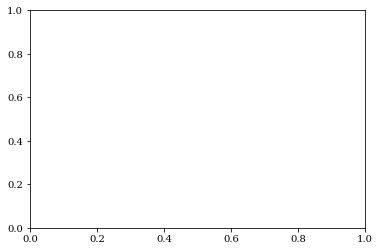

In [117]:
'''
plt.rc('font', family='serif')
fig = plt.figure()

plt.plot(range(epochs), history['val_acc'], label='acc', color='black')

plt.xlabel('epochs')
plt.ylabel('validation loss')

plt.show()
'''
# 이부분은 나중에 고쳐보겠습니다.